## Data Unst

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Student_performance_data.csv")


print(df.head(10))

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   
5       1006   18       0          0                  1         8.191219   
6       1007   15       0          1                  1        15.601680   
7       1008   15       1          1                  4        15.424496   
8       1009   17       0          0                  0         4.562008   
9       1010   16       1          0                  1        18.444466   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0    

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [5]:
#double check boxplot
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found!")
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

No missing values found!


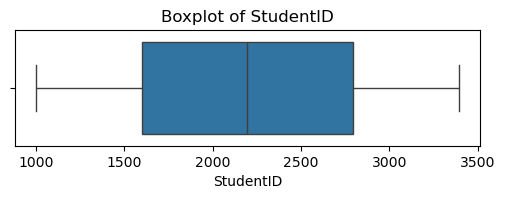

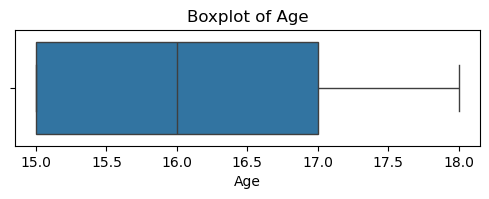

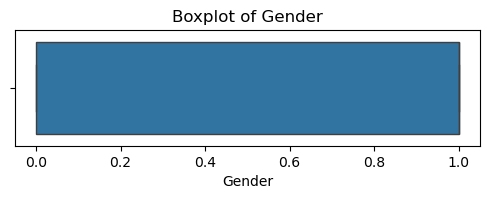

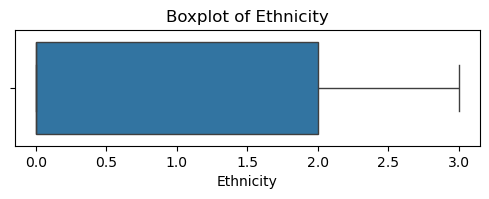

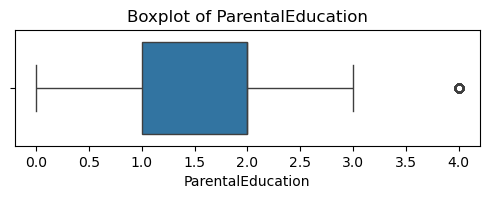

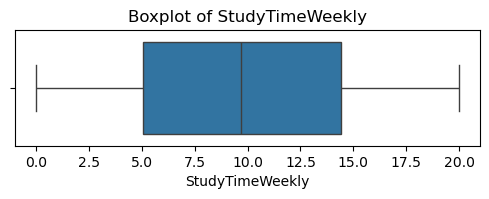

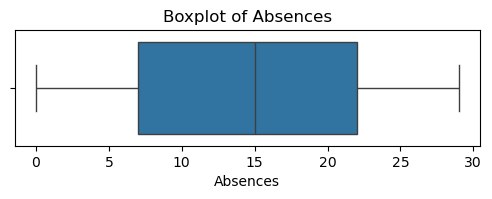

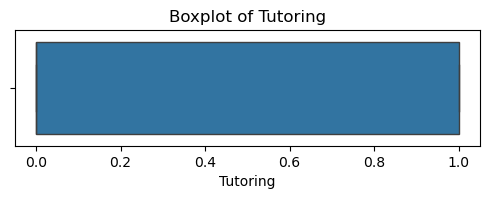

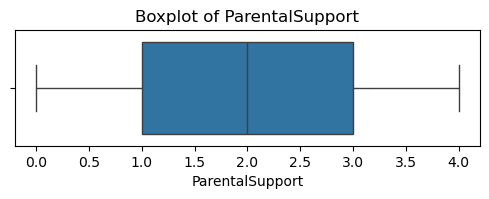

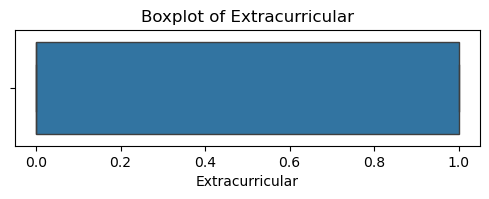

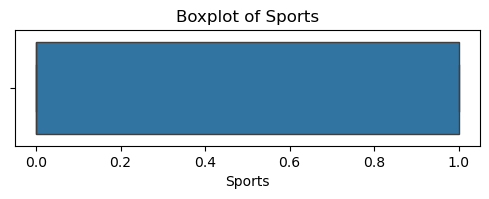

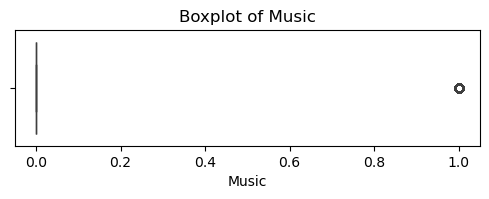

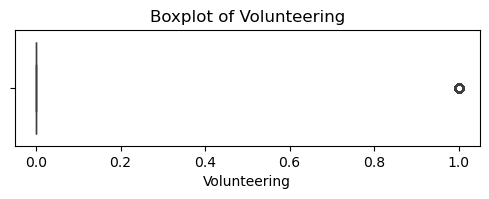

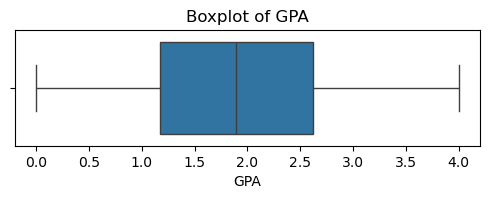

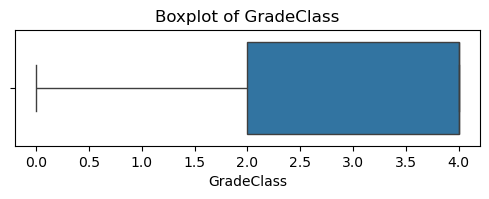

In [6]:
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [7]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

In [8]:
print("\n Checking for outliers:")
for col in numeric_cols:
    outliers = find_outliers_iqr(df, col)
    if not outliers.empty:
        print(f" {len(outliers)} outlier(s) found in '{col}'")
    else:
        print(f" No outliers in '{col}'")



 Checking for outliers:
 No outliers in 'StudentID'
 No outliers in 'Age'
 No outliers in 'Gender'
 No outliers in 'Ethnicity'
 120 outlier(s) found in 'ParentalEducation'
 No outliers in 'StudyTimeWeekly'
 No outliers in 'Absences'
 No outliers in 'Tutoring'
 No outliers in 'ParentalSupport'
 No outliers in 'Extracurricular'
 No outliers in 'Sports'
 471 outlier(s) found in 'Music'
 376 outlier(s) found in 'Volunteering'
 No outliers in 'GPA'
 No outliers in 'GradeClass'


In [9]:
print("ParentalEducation:", df['ParentalEducation'].unique())
print("Music:", df['Music'].unique())
print("Volunteering:", df['Volunteering'].unique())

ParentalEducation: [2 1 3 4 0]
Music: [1 0]
Volunteering: [0 1]


In [10]:
print(df.info())
print(df.isnull().sum())  # check for missing values
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
StudentID          

In [ ]:
df.dropna(inplace=True)  # Drop rows with missing values


df['GradeClass'] = pd.to_numeric(df['GradeClass'], errors='coerce')

KeyError: "['StudentID'] not found in axis"

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['StudyTimeWeekly', 'Absences', 'GPA']] = scaler.fit_transform(df[['StudyTimeWeekly', 'Absences', 'GPA']]) #rescales for better performance

X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)  # keeps class balance

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv("cleaned_train_data.csv", index=False)
test_df.to_csv("cleaned_test_data.csv", index=False)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [31]:
#Training Time
train_df = pd.read_csv("cleaned_train_data.csv")
test_df = pd.read_csv("cleaned_test_data.csv")

X_train = train_df.drop("GradeClass", axis=1)
y_train = train_df["GradeClass"]
#Drop from categories
X_test = test_df.drop("GradeClass", axis=1)
y_test = test_df["GradeClass"]

In [32]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)
print(" Classification Report:\n")
print(classification_report(y_test, y_pred))

 Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      0.29      0.44        21
         1.0       0.82      0.87      0.85        54
         2.0       0.90      0.95      0.93        78
         3.0       0.89      0.89      0.89        83
         4.0       0.94      0.97      0.96       243

    accuracy                           0.91       479
   macro avg       0.91      0.79      0.81       479
weighted avg       0.92      0.91      0.90       479



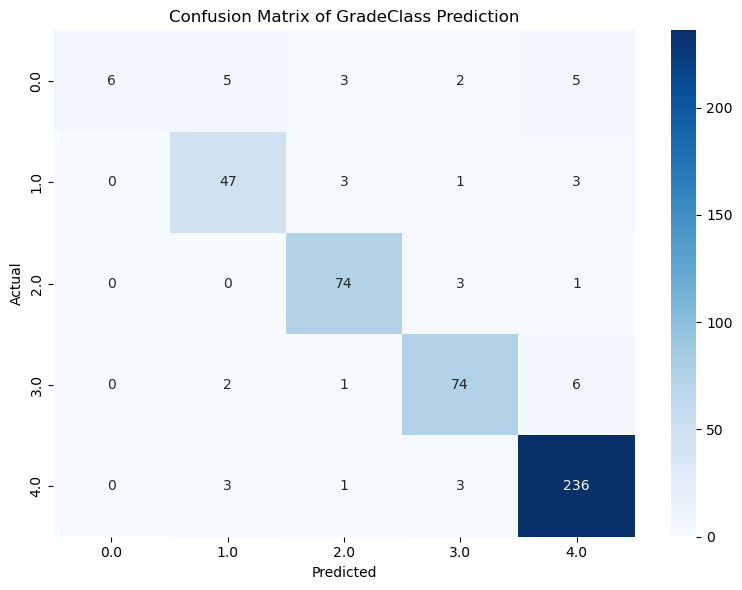

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
grade_labels = ['A', 'B', 'C', 'D', 'F']
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of GradeClass Prediction")
plt.tight_layout()
plt.savefig("RandomForest_Confusion-matrix_Heat.png")
plt.show()

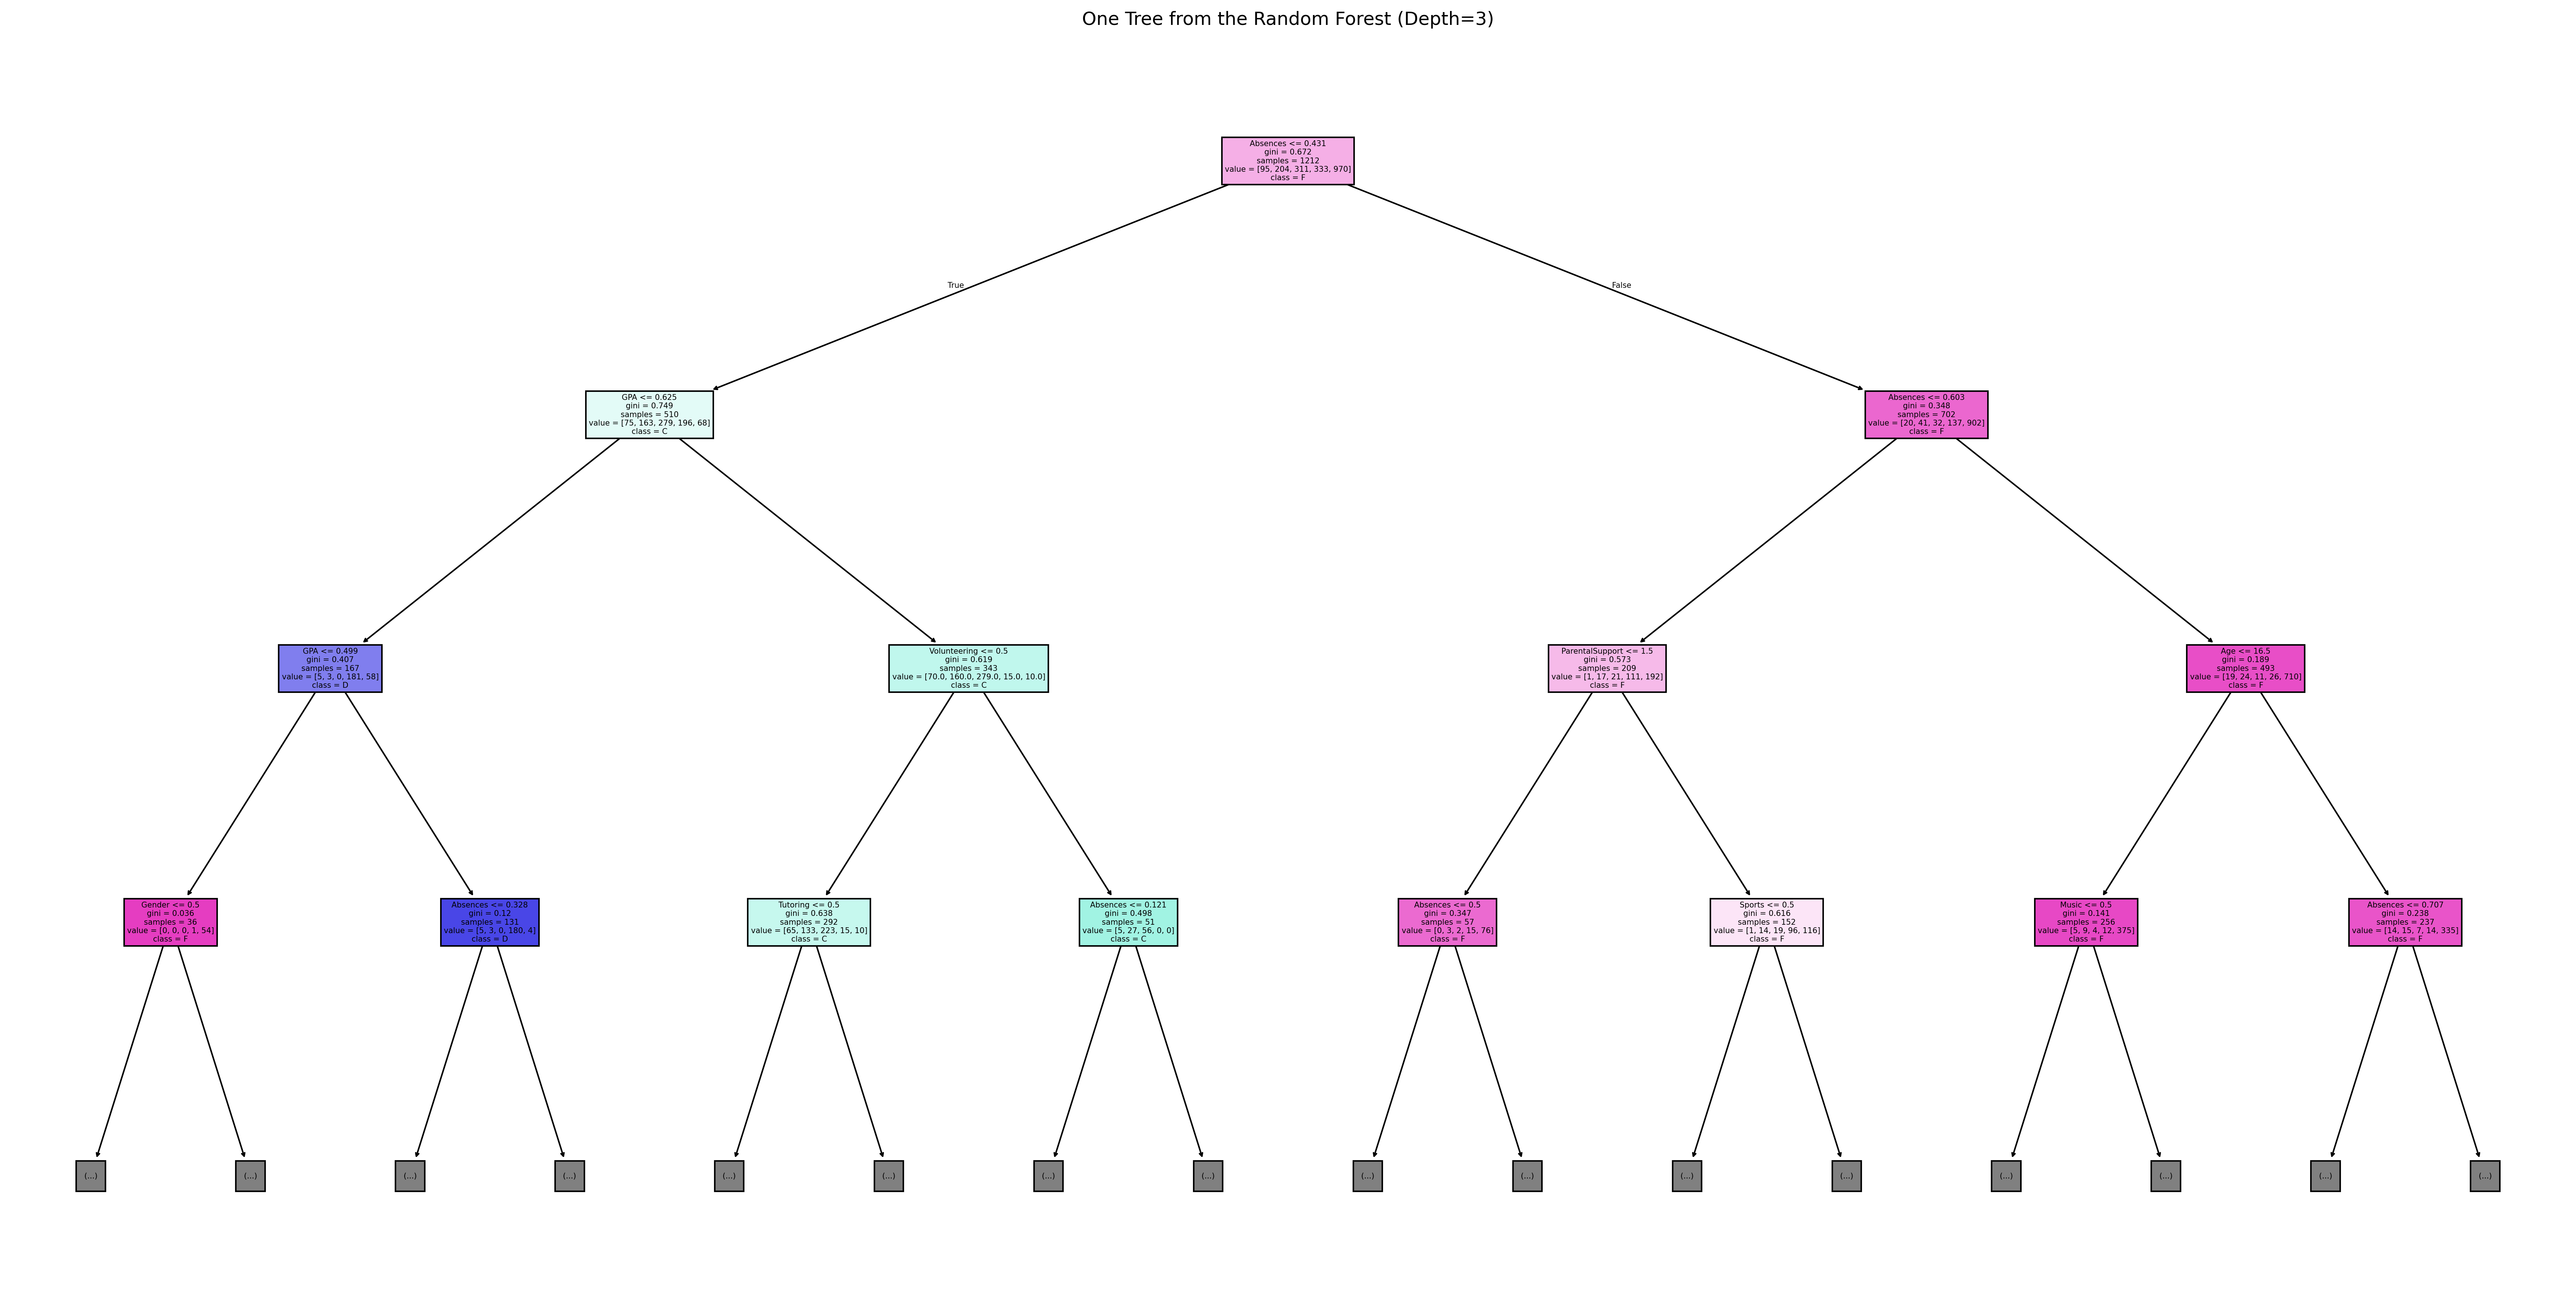

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,15), dpi=300)
plot_tree(model.estimators_[0], feature_names=X_train.columns, class_names=grade_labels, filled=True, max_depth=3)
plt.title("One Tree from the Random Forest (Depth=3)")
plt.savefig("OneTree-Depth3.png", dpi=300)
plt.show()

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

C:\Users\gomom\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:01:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [38]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.48      0.65        21
         1.0       0.89      0.89      0.89        54
         2.0       0.91      0.95      0.93        78
         3.0       0.89      0.87      0.88        83
         4.0       0.93      0.97      0.95       243

    accuracy                           0.92       479
   macro avg       0.92      0.83      0.86       479
weighted avg       0.92      0.92      0.91       479



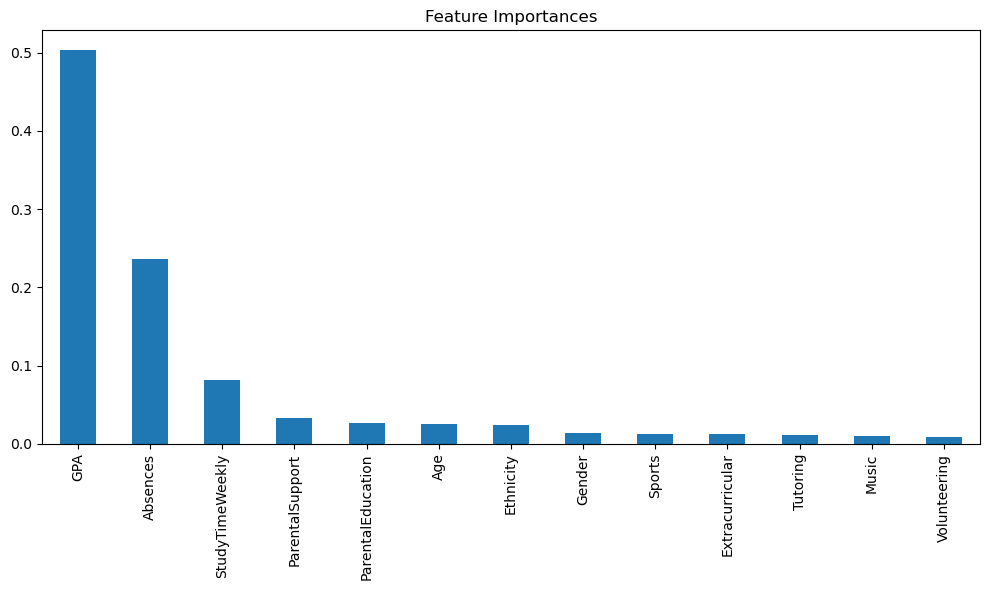

In [39]:
importances = model.feature_importances_
feature_names = X_train.columns

# Plot
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(10,6), title='Feature Importances')
plt.tight_layout()
plt.savefig("FeautureImportance.png")
plt.show()